<center><img src="https://media.licdn.com/dms/image/D4D0BAQHOLNi1297n2g/company-logo_200_200/0/1697658047551?e=1707955200&v=beta&t=PaSbWR-y89ji3AKX9SAQs4dHjmhhgENXgMzasUTpgrE"></center>

This Project is the traditionnal machine learning project, the main objective is to practice `Python`, `Data Cleaning`, `Data Visualization` `Machine Learning`.

The main objectif is to train a machine learning model for titanic prediction based on a structured data.

# Set Up the envirement  
* Importing all necessary libraries : 

In [371]:
import pandas as pd
import math as mt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

* Importing DataSet from `CSV` file using Pandas : 

In [372]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the shape of the data frame : 

In [373]:
df.shape

(891, 12)

So we have $891$ of rows and $12$ colomns , till now we have $11$ features and $x_1, x_2, ..., x_{11}$ and two type of decisions $y = \{0, 1\}$ .

Actually we don't need all the data, just some of them are enagh to make a good decisions :

# Data visualization : 

In [374]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We Want to know the type of the distribution of age, sex and Classes

<Axes: xlabel='Survived', ylabel='Count'>

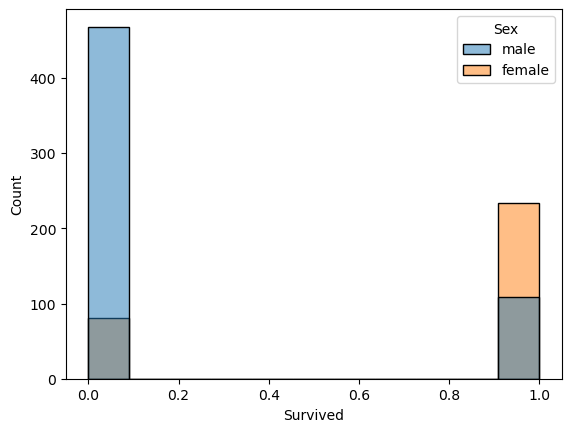

In [375]:
sns.histplot(data=df, x="Survived", hue="Sex")

<Axes: xlabel='Age', ylabel='Count'>

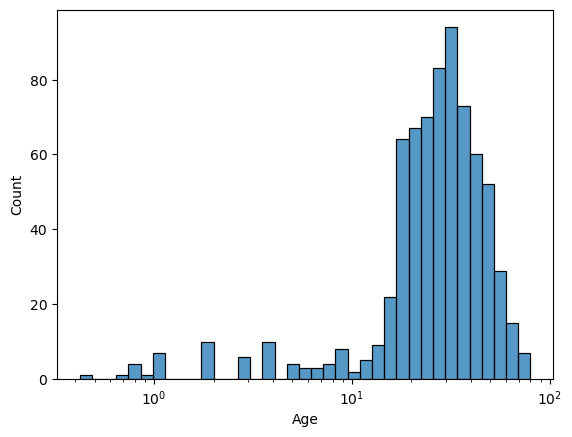

In [376]:
sns.histplot(data=df, x="Age", log_scale=True)

<Axes: xlabel='Age', ylabel='PassengerId'>

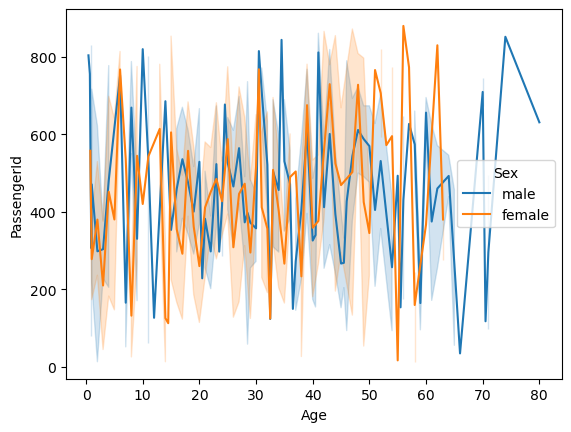

In [377]:
sns.lineplot(data=df, x="Age", y="PassengerId", hue="Sex")

c:\Users\khaba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


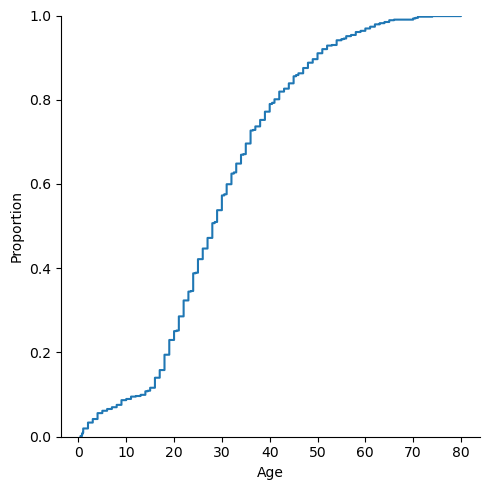

In [378]:
sns.displot(data=df, x="Age", kind="ecdf")

* Data cleaning : 

In [379]:
sex = df["Sex"]

# we have data non numerical, we need to change it into numerical values : 

# Convert the sex array into numpy
sex = np.array(sex)

# We will make 0: male and  1: female
for i in range(0, sex.shape[0]):
    if sex[i] == "female":
        sex[i] = float(1)
    if sex[i] == "male":
        sex[i] = float(0)

# Convert the numpy array to a torch tensor : 
sex = sex.astype(float) # Migrate from dtype = object to dtype = float because tensors accept only float objects as a data 
sex = torch.tensor(sex)

# Convert the sex object to a matrix (1 x D) : 
sex = sex.reshape((1, sex.shape[0]))
sex.shape

torch.Size([1, 891])

For the class , it's easy, we already have numerical values : 

In [380]:
Pclass = df["Pclass"]
Pclass = np.array(Pclass)

In [381]:
# changing the dtype of the array : 
Pclass = Pclass.astype(float)

# Creating the tensor : 
Pclass = torch.tensor(Pclass)

In [382]:
Pclass = Pclass.reshape((1, Pclass.shape[0]))
Pclass.shape

torch.Size([1, 891])

Age data set is also simple : 

In [383]:
age = df["Age"]
age = np.array(age)

# Replace all the NAN values with 0 : 

for i in range(age.shape[0]):
    if mt.isnan(age[i]):
        age[i] = float(0.0)

In [384]:
age[0: 20]  # Showing 19 values 

array([22., 38., 26., 35., 35.,  0., 54.,  2., 27., 14.,  4., 58., 20.,
       39., 14., 55.,  2.,  0., 31.,  0.])

In [385]:
# Tensor transformations
age = torch.tensor(age)
age = age.reshape((1, age.shape[0]))

In [386]:
age.shape

torch.Size([1, 891])

In [387]:
sex = sex.reshape((sex.shape[1], 1))
age = age.reshape((age.shape[1], 1))
Pclass = Pclass.reshape((Pclass.shape[1], 1))

In [388]:
# Creating the new dataset : 

X = torch.cat((sex, age, Pclass), 1)


In [389]:
X

tensor([[ 0., 22.,  3.],
        [ 1., 38.,  1.],
        [ 1., 26.,  3.],
        ...,
        [ 1.,  0.,  3.],
        [ 0., 26.,  1.],
        [ 0., 32.,  3.]], dtype=torch.float64)

We need to introduce the y vector of $y = \{0, 1\}$

In [390]:
y = df["Survived"]
y = np.array(y)
y = y.astype(float)
y = torch.tensor(y)

In [391]:
y.shape

torch.Size([891])

In [392]:
y = y.reshape((y.shape[0], 1))

In [393]:
y.shape

torch.Size([891, 1])

In [394]:
X

tensor([[ 0., 22.,  3.],
        [ 1., 38.,  1.],
        [ 1., 26.,  3.],
        ...,
        [ 1.,  0.,  3.],
        [ 0., 26.,  1.],
        [ 0., 32.,  3.]], dtype=torch.float64)

In [395]:
y.shape

torch.Size([891, 1])

In [396]:
class data2D(Dataset):
    def __init__(self, input_data, output_data):
        self.input_data = input_data
        self.output_data = output_data
        self.len = input_data.shape[0]
    
    def __getitem__(self, index):
        return self.input_data[index], self.output_data[index]

    def __len__(self):
        return self.len

In [397]:
dataset = data2D(input_data=X, output_data=y)
dataset

In [398]:
a, b = dataset.__getitem__(60)
a

tensor([ 0., 22.,  3.], dtype=torch.float64)

In [399]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [400]:
torch.manual_seed(1)

In [401]:
model = LR(input_size=3, output_size=1).double()

list(model.parameters())

[Parameter containing:
 tensor([[ 0.2975, -0.2548, -0.1119]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.2710], dtype=torch.float64, requires_grad=True)]

In [402]:
criterion = nn.MSELoss()

In [403]:
from torch.utils.data import random_split

# Assuming you already have your dataset object named 'dataset'
total_size = len(dataset)
train_size = int(0.8 * total_size)  # Adjust the split ratio as needed

# Calculate the size of the training and test sets
train_set, test_set = random_split(dataset, [train_size, total_size - train_size])

# Create DataLoader for training and testing sets
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)

In [404]:
optimizer = optim.Adam(model.parameters(), lr=0.1)

Epoch 1/100, Loss: 1.4409, Accuracy: 0.5885


Epoch 2/100, Loss: 2.9410, Accuracy: 0.6096
Epoch 3/100, Loss: 0.8252, Accuracy: 0.6419
Epoch 4/100, Loss: 2.3130, Accuracy: 0.6419
Epoch 5/100, Loss: 1.7043, Accuracy: 0.6053
Epoch 6/100, Loss: 2.3618, Accuracy: 0.5983
Epoch 7/100, Loss: 0.7659, Accuracy: 0.6320
Epoch 8/100, Loss: 1.6196, Accuracy: 0.6053
Epoch 9/100, Loss: 2.7424, Accuracy: 0.6138
Epoch 10/100, Loss: 3.0882, Accuracy: 0.6376
Epoch 11/100, Loss: 0.8278, Accuracy: 0.6053
Epoch 12/100, Loss: 0.9423, Accuracy: 0.6166
Epoch 13/100, Loss: 1.6502, Accuracy: 0.6180
Epoch 14/100, Loss: 0.7167, Accuracy: 0.6517
Epoch 15/100, Loss: 4.5353, Accuracy: 0.5955
Epoch 16/100, Loss: 0.3308, Accuracy: 0.7037
Epoch 17/100, Loss: 0.5090, Accuracy: 0.6657
Epoch 18/100, Loss: 3.1689, Accuracy: 0.5955
Epoch 19/100, Loss: 2.2069, Accuracy: 0.6615
Epoch 20/100, Loss: 1.8879, Accuracy: 0.6433
Epoch 21/100, Loss: 3.1151, Accuracy: 0.6194
Epoch 22/100, Loss: 0.7095, Accuracy: 0.6587
Epoch 23/100, Loss: 1.0484, Accuracy: 0.6124
Epoch 24/100, Loss

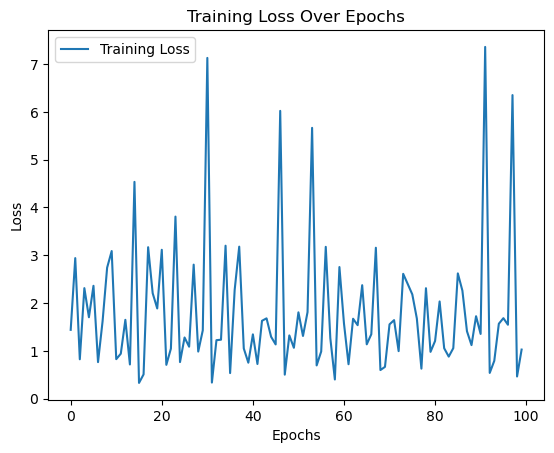

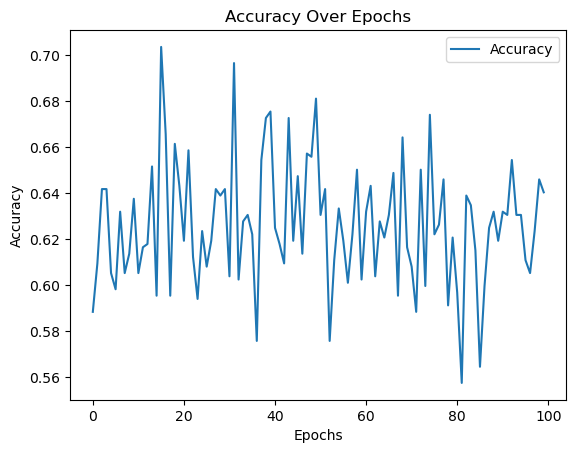

In [405]:
train_loss_values = []
accuracy_values = []

for epoch in range(100):
    epoch_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for x, y in train_loader:
        x = x.to(torch.double)
        y = y.to(torch.double)
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        y_pred_binary = (yhat.detach().numpy() > 0.5).astype(int)
        correct_predictions += np.sum(y_pred_binary == y.numpy())
        total_samples += len(y)

    avg_epoch_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_samples

    train_loss_values.append(avg_epoch_loss)
    accuracy_values.append(accuracy)

    print(f'Epoch {epoch+1}/{100}, Loss: {avg_epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

plt.plot(train_loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

Testing the model 

In [406]:
model.eval()

true_labels = []
predicted_labels = []

for x, y_true in test_loader:
    with torch.no_grad():
        y_pred = model(x)

    y_pred_binary = (y_pred.numpy() > 0.5).astype(int)

    true_labels.extend(y_true.numpy())
    predicted_labels.extend(y_pred_binary)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)